In [4]:
import pandas as pd
from sqlalchemy import create_engine, MetaData
pub = pd.read_csv("datasets/beginner_datasets/Mappa-dei-pub-circoli-locali-in-Italia.csv", encoding = "latin1", sep =";")

Esaminiamo il dataset:
• quanti dati ci sono in totale?
• quali sono i metadati?
• stampiamo il primo elemento
• stampiamo l'ultimo elemento
• riusciamo a stampare un elemento a caso?
• quali sono gli anni di inserimento presenti?
• quante attività ci sono nel quadrato di longitudine 9-10 e latitudine 45-46?
• quante attività ci sono nella provincia di Vicenza?
• quante enoteche ci sono, e come si chiamano?
• quante attività ci sono in Lazio e Abruzzo assieme?

In [ ]:
# • quanti dati ci sono in totale?

In [6]:
pub.index

RangeIndex(start=0, stop=2635, step=1)

In [8]:
pub.describe()

,Anno inserimento,Identificatore in OpenStreetMap,Longitudine,Latitudine
count,2635.000000,2.635000e+03,2635.000000,2635.000000
mean,2012.831120,1.863583e+09,11.440212,43.997322
std,1.911466,1.059639e+09,2.338170,2.137994
min,2007.000000,3.203094e+07,6.708958,36.680786
25%,2012.000000,9.328297e+08,9.225153,42.351325
50%,2013.000000,1.790185e+09,11.387645,44.905865
75%,2014.000000,2.651045e+09,12.604773,45.598054
max,2016.000000,4.012443e+09,18.444577,46.983781


In [10]:
pub.columns

Index(['Comune', 'Provincia', 'Regione', 'Nome', 'Anno inserimento',
       'Data e ora inserimento', 'Identificatore in OpenStreetMap',
       'Longitudine', 'Latitudine'],
      dtype='object')

In [12]:
pub.shape

(2635, 9)

In [58]:
# • quali sono i metadati?
pub.dtypes

Comune                              object
Provincia                           object
Regione                             object
Nome                                object
Anno inserimento                     int64
Data e ora inserimento              object
Identificatore in OpenStreetMap      int64
Longitudine                        float64
Latitudine                         float64
dtype: object

In [14]:
# • stampiamo il primo elemento
pub.head(1)

,Comune,Provincia,Regione,Nome,Anno inserimento,Data e ora inserimento,Identificatore in OpenStreetMap,Longitudine,Latitudine
0,ALTRO,ALTRO,ALTRO,NaN,2011,2011-06-25T23:17:43Z,1339088150,13.733257,45.57583


In [16]:
# • stampiamo l'ultimo elemento
pub.tail(1)

,Comune,Provincia,Regione,Nome,Anno inserimento,Data e ora inserimento,Identificatore in OpenStreetMap,Longitudine,Latitudine
2634,TRANI,BARLETTA-ANDRIA-TRANI,Puglia,Well's Fargo,2009,2009-08-10T12:44:03Z,387223648,16.436765,41.267264


In [18]:
# • riusciamo a stampare un elemento a caso?
pub.sample(1)

,Comune,Provincia,Regione,Nome,Anno inserimento,Data e ora inserimento,Identificatore in OpenStreetMap,Longitudine,Latitudine
2339,RENDE,COSENZA,Calabria,West Pub,2011,2011-10-27T22:02:47Z,996912495,16.24242,39.354063


In [20]:
# • quali sono gli anni di inserimento presenti?

anni = pub['Anno inserimento'].sort_values(ascending=True).unique() # concateno le funzioni (in ordine di anno e poi i valori unici
print(f"Gli anni di inserimento sono i seguenti: \n {anni}")

Gli anni di inserimento sono i seguenti: 
 [2007 2008 2009 2010 2011 2012 2013 2014 2015 2016]


In [22]:
# • quante attività ci sono nel quadrato di longitudine 9-10 e latitudine 45-46?
lon = (pub["Longitudine"] >= 9) & (pub["Longitudine"] <= 10)
lat = (pub["Latitudine"] >= 45) & (pub["Latitudine"] <= 46)
conteggio = len(pub[lon & lat])
print(f"il numero di attività compreso nei valori di Longitudine 9-10 e Latitudine 45-46 è {conteggio}")

il numero di attività compreso nei valori di Longitudine 9-10 e Latitudine 45-46 è 306


In [24]:
#• quante attività ci sono nella provincia di Vicenza?
vice = pub["Provincia"] == "VICENZA"
cont_vice = len(pub[vice])
print(f"il numero di attività nella provincia di Vicenza è {cont_vice}")


il numero di attività nella provincia di Vicenza è 73


In [26]:
# • quante enoteche ci sono, e come si chiamano?
eno = pub["Nome"].str.contains("enoteca", case=False, na=False)
pub[eno]

,Comune,Provincia,Regione,Nome,Anno inserimento,Data e ora inserimento,Identificatore in OpenStreetMap,Longitudine,Latitudine
64,TORINO,CITTA' METROPOLITANA DI TORINO,Piemonte,"Enoteca con Cucina""""Tirolin""""",2012,2012-01-24T14:30:04Z,1603586163,7.713993,45.065174
496,MILANO,CITTA' METROPOLITANA DI MILANO,Lombardia,Concordia Enoteca,2014,2014-04-01T11:15:38Z,2758108717,9.171033,45.450819
1003,MALO,VICENZA,Veneto,Enoteca Umberto,2013,2013-04-15T08:41:22Z,1659350138,11.418507,45.653453
1491,FERRARA,FERRARA,Emilia-Romagna,"Enoteca """"Al Brindisi""""",2015,2015-03-31T17:33:38Z,1249699754,11.620326,44.835890
1492,FERRARA,FERRARA,Emilia-Romagna,"Enoteca """"da Massimo""""",2015,2015-03-31T17:33:38Z,1249701207,11.619559,44.834824
1723,CASCIANA TERME LARI,PISA,Toscana,Enoteca Il Violino Rosso,2015,2015-08-20T13:12:56Z,3706561154,10.591535,43.566210


In [40]:
# SECONDO METODO ENOTECHE (con il ciclo for)
enoteche = [] # inizializzazione
for nome in pub["Nome"]:
    nome = str(nome) # casting
    if "enoteca" in nome.lower():
        enoteche.append(nome)
        print(nome)
print("\n", enoteche, len(enoteche))

Enoteca con Cucina""Tirolin""
Concordia Enoteca
Enoteca Umberto
Enoteca ""Al Brindisi""
Enoteca ""da Massimo""
Enoteca Il Violino Rosso

 ['Enoteca con Cucina""Tirolin""', 'Concordia Enoteca', 'Enoteca Umberto', 'Enoteca ""Al Brindisi""', 'Enoteca ""da Massimo""', 'Enoteca Il Violino Rosso'] 6


In [46]:
# • quante attività ci sono in Lazio e Abruzzo assieme?
laz = pub["Regione"] == "Lazio"
abr = pub["Regione"] == "Abruzzo"
cont_la = (len(pub[laz]) | len(pub[abr]))
print(f"il numero di attività nelle regioni Lazio e Abruzzo è {cont_la}")

il numero di attività nelle regioni Lazio e Abruzzo è 305


Il dataset insurance.csv dei beginner_datasets contiene dati su
caratteristiche e abitudini delle persone rispetto ai costi individuali per le cure
mediche come premio per le assicurazioni sulla salute.
• Visualizziamone le dimensioni, un'anteprima, e osserviamo i nomi di colonna;
• Quali sono le medie di charges rispetto a region? Ci sono differenze
significative?
• E rispetto a smoker? E a sex?
• Quali sono i descrittori statistici di bmi? Quali sono minimo, media e
massimo di charges rispetto ai diversi quartili dei valori di bmi?
Nota: è lo stesso esercizio della volta scorsa, ma stavolta da eseguire con il
metodo .groupby()

In [65]:
# • Visualizziamone le dimensioni, un'anteprima, e osserviamo i nomi di colonna;
import pandas as pd

filepath = "datasets/beginner_datasets/insurance.csv"

ins = pd.read_csv(filepath)
ins.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [67]:
ins.shape

(1338, 7)

In [69]:
ins.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [71]:
ins.index

RangeIndex(start=0, stop=1338, step=1)

In [79]:
ins.sample(5)

,age,sex,bmi,children,smoker,region,charges
770,61,male,36.100,3,no,southwest,27941.28758
1229,58,male,30.305,0,no,northeast,11938.25595
392,48,male,31.445,1,no,northeast,8964.06055
1223,20,female,24.420,0,yes,southeast,26125.67477
192,25,male,25.740,0,no,southeast,2137.65360


In [77]:
ins.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [82]:
#• Quali sono le medie di charges rispetto a region? Ci sono differenze significative?
ins.groupby("region")["charges"].mean().round(3)

region
northeast    13406.385
northwest    12417.575
southeast    14735.411
southwest    12346.937
Name: charges, dtype: float64

In [84]:
# • E rispetto a smoker?
ins.groupby("smoker")["charges"].mean().round(3)

smoker
no      8434.268
yes    32050.232
Name: charges, dtype: float64

In [86]:
# • E a sex?
ins.groupby("sex")["charges"].mean().round(3)

sex
female    12569.579
male      13956.751
Name: charges, dtype: float64

In [91]:
# • Quali sono i descrittori statistici di bmi?
ins["bmi"].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [ ]:
# • Quali sono minimo, media e massimo di charges rispetto ai diversi quartili dei valori di bmi?
limit_quantiles = list(ins["bmi"].describe())[-4:-1]
pr_qrt = ins["bmi"] < limit_quantiles[0]  # in questa maniera definisco i valori che andranno nella colonna quartili
sec_qrt = (ins["bmi"] >= limit_quantiles[0]) & (ins["bmi"] < limit_quantiles[1])
ter_qrt = (ins["bmi"] >= limit_quantiles[1]) & (ins["bmi"] < limit_quantiles[2])
qua_qrt = ins["bmi"] >= limit_quantiles[2]
df.loc[pr_qrt, "BMI Quartile"] = "Q1: Under 26.29" # nuova colonna
df.loc[sec_qrt, "BMI Quartile"] = "Q2: btw 26.30-30.40"
df.loc[ter_qrt, "BMI Quartile"] = "Q3 btw 30.40-34.69"
df.loc[qua_qrt, "BMI Quartile"] = "Q4: Over30.40"
quartile = df.groupby("BMI Quartile") # <-- è il nome della colonna
round(quartile["charges"].agg(["count", "min", "max", "mean"]), 3)

Carichiamo in un DataFrame il dataset iris.csv dei beginner_datasets e
calcoliamo:
• La media della lunghezza dei petali di tutto il dataset
• La media della lunghezza dei petali per ogni specie di Iris, utilizzando il metodo .groupby()
• Media, minimo e massimo della larghezza dei sepali per ogni specie, utilizzando .groupby() e .agg()

In [101]:
import pandas as pd

filepath = "datasets/beginner_datasets/iris.csv"

iris = pd.read_csv(filepath)
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [103]:
iris.shape

(150, 5)

In [105]:
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
112,6.8,3.0,5.5,2.1,Iris-virginica
87,6.3,2.3,4.4,1.3,Iris-versicolor
127,6.1,3.0,4.9,1.8,Iris-virginica
53,5.5,2.3,4.0,1.3,Iris-versicolor
37,4.9,3.1,1.5,0.1,Iris-setosa


In [107]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [117]:
# • La media della lunghezza dei petali di tutto il dataset
avg_lenght_iris = iris['petal_length'].mean().round(3)
avg_lenght_iris

3.759

In [131]:
#• La media della lunghezza dei petali per ogni specie di Iris, utilizzando il metodo .groupby()
avg_lenght_species = iris.groupby('species')['petal_length'].mean().round(3)
avg_lenght_species

species
Iris-setosa        1.464
Iris-versicolor    4.260
Iris-virginica     5.552
Name: petal_length, dtype: float64

In [137]:
# • Media, minimo e massimo della larghezza dei sepali per ogni specie, utilizzando .groupby() e .agg()
width_species = iris.groupby("species").agg({"sepal_width": ["count", "mean", "max", "min"]})
width_species                                             

sepal_width                 
                      count   mean  max  min
species                                     
Iris-setosa              50  3.418  4.4  2.3
Iris-versicolor          50  2.770  3.4  2.0
Iris-virginica           50  2.974  3.8  2.2

Nei beginner_datasets, il dataset wine.csv contiene delle analisi
organolettiche su diverse qualità di vini:
• Qual è la media di concentrazione alcolica per ogni qualità? Ci sono
differenze? E rispetto alla media totale?
• C'è differenza nella concentrazione alcolica per vini bianchi e vini rossi?
• Rifacendo le analisi delle domande precedenti ma per il pH, cambia
qualcosa?
• E per i solfati?

In [139]:
import pandas as pd

filepath = "datasets/beginner_datasets/wine.csv"

wine = pd.read_csv(filepath)
wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
type                     object
dtype: object

In [141]:
wine.shape

(6497, 13)

In [143]:
wine.index

RangeIndex(start=0, stop=6497, step=1)

In [145]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [147]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [149]:
wine.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
4520,6.7,0.390,0.31,2.7,0.054,27.0,202.0,0.99480,3.46,0.57,10.5,6,white
212,11.6,0.440,0.64,2.1,0.059,5.0,15.0,0.99800,3.21,0.67,10.2,6,red
3447,8.7,0.490,0.57,17.8,0.052,34.0,243.0,1.00070,2.98,0.82,9.0,5,white
537,8.1,0.825,0.24,2.1,0.084,5.0,13.0,0.99720,3.37,0.77,10.7,6,red
1346,6.1,0.590,0.01,2.1,0.056,5.0,13.0,0.99472,3.52,0.56,11.4,5,red


In [157]:
# Qual è la media di concentrazione alcolica per ogni qualità? Ci sono differenze? E rispetto alla media totale?
avg_alc_qua = wine.groupby("quality")["alcohol"].mean().round(3)
avg_total = wine["alcohol"].mean().round(3)
print(f"La media della concentrazione alcolica totale è {avg_total}, a seguire la concentrazione alcolica divisa per qualità \n {avg_alc_qua}")

La concentrazione alcolica totale è 10.492, a seguire la concentrazione alcolica divisa per qualità 
 quality
3    10.215
4    10.180
5     9.838
6    10.588
7    11.386
8    11.679
9    12.180
Name: alcohol, dtype: float64


In [161]:
# • C'è differenza nella concentrazione alcolica per vini bianchi e vini rossi?
avg_alc_col = wine.groupby("type")["alcohol"].mean().round(3)
avg_alc_col

type
red      10.423
white    10.514
Name: alcohol, dtype: float64

In [167]:
# • Rifacendo le analisi delle domande precedenti ma per il pH, cambia qualcosa?
avg_ph_qua = wine.groupby("quality")["pH"].mean().round(3)
avg_ph_total = wine["pH"].mean().round(3)
print(f"La media del pH totale è {avg_ph_total}, a seguire la media del pH divisa per qualità \n {avg_ph_qua}")

La media del pH totale è 3.219, a seguire la media del pH divisa per qualità 
 quality
3    3.258
4    3.232
5    3.212
6    3.218
7    3.228
8    3.223
9    3.308
Name: pH, dtype: float64


In [169]:
avg_ph_col = wine.groupby("type")["pH"].mean().round(3)
avg_ph_col

type
red      3.311
white    3.188
Name: pH, dtype: float64

In [171]:
# • E per i solfati?
avg_sul_qua = wine.groupby("quality")["sulphates"].mean().round(3)
avg_sul_total = wine["sulphates"].mean().round(3)
print(f"La media del pH totale è {avg_sul_total}, a seguire la media del pH divisa per qualità \n {avg_sul_qua}")

La media del pH totale è 0.531, a seguire la media del pH divisa per qualità 
 quality
3    0.506
4    0.506
5    0.526
6    0.533
7    0.547
8    0.512
9    0.466
Name: sulphates, dtype: float64


In [173]:
avg_sul_col = wine.groupby("type")["sulphates"].mean().round(3)
avg_sul_col

type
red      0.658
white    0.490
Name: sulphates, dtype: float64

Nei beginner_datasets, il file boston.csv contiene il Boston Housing Dataset, che deriva dalle informazioni raccolte dal Census Service degli Stati Uniti sulle abitazioni nell'area di Boston. Di seguito vengono descritte le colonne del
dataset:
• CRIM - tasso di criminalità pro capite per città
• ZN - proporzione di terreni residenziali suddivisi in zone per lotti superiori a 25.000 piedi quadrati.
• INDUS - percentuale di acri di attività commerciali non al dettaglio per città.
• CHAS - variabile dummy del fiume Charles (1 se il tratto costeggia il fiume; 0 altrimenti)
• NOX - concentrazione di ossidi di azoto (parti per 10 milioni).
• RM - numero medio di stanze per abitazione
• AGE - proporzione di unità abitative occupate da proprietari costruite prima del 1940
• DIS - distanze ponderate da cinque centri occupazionali di Boston
• RAD - indice di accessibilità alle autostrade radiali
• TAX - aliquota dell'imposta fondiaria sul valore pieno per 10.000 dollari
• PTRATIO - rapporto alunni-insegnanti per città
• BLACK - la percentuale di neri per città
• LSTAT - % di popolazione di condizione più bassa
• MEDV - Valore mediano delle case, espresso in migliaia di dollari

In [4]:
import pandas as pd

filepath = "datasets/beginner_datasets/boston.csv"

boston = pd.read_csv(filepath)
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [6]:
boston.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [8]:
boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [10]:
boston.shape

(506, 14)

In [12]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [14]:
boston.sample(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4
394,13.35980,0.0,18.10,0,0.693,5.887,94.7,1.7821,24,666,20.2,396.90,16.35,12.7
305,0.05479,33.0,2.18,0,0.472,6.616,58.1,3.3700,7,222,18.4,393.36,8.93,28.4
483,2.81838,0.0,18.10,0,0.532,5.762,40.3,4.0983,24,666,20.2,392.92,10.42,21.8
412,18.81100,0.0,18.10,0,0.597,4.628,100.0,1.5539,24,666,20.2,28.79,34.37,17.9


• La media del prezzo delle case cambia a seconda della distanza dal fiume Charles?
• Si nota una correlazione tra il tasso di criminalità e il valore delle abitazioni? Come si può spiegare il risultato?
• Qual è la media del numero di stanze rispetto al rapporto alunni-insegnanti?
• E del valore delle case? Appare esserci una qualche correlazione? Come si può spiegare il risultato?
• Rispetto all'accessibilità alle autostrade, cambia qualcosa la media delle età delle abitazioni? E del numero di stanze? E delle tasse?

In [16]:
# • La media del prezzo delle case cambia a seconda della distanza dal fiume Charles?
avg_house = boston.groupby("chas")["medv"].mean().round(3)
avg_house

chas
0    22.094
1    28.440
Name: medv, dtype: float64

In [46]:
# • Si nota una correlazione tra il tasso di criminalità e il valore delle abitazioni? Come si può spiegare il risultato?
corr_price_crim = boston[["crim", "medv"]].corr()

corr_price_crim

,crim,medv
crim,1.000000,-0.388305
medv,-0.388305,1.000000


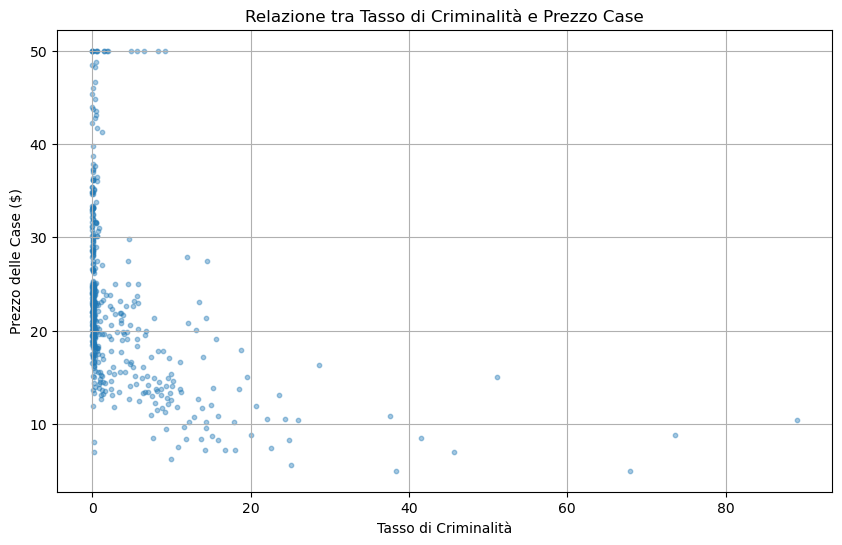

In [90]:
import matplotlib.pyplot as plt
# Scatter plot
plt.figure(figsize=(10, 6))  # Imposta le dimensioni della figura
plt.scatter(boston["crim"], boston["medv"], s=10, alpha=0.4) # Imposta le dimensioni dei punti e la trasparenza
plt.title("Relazione tra Tasso di Criminalità e Prezzo Case")
plt.xlabel("Tasso di Criminalità")
plt.ylabel("Prezzo delle Case ($)")
plt.grid(True)
plt.show()

In [40]:
# • Qual è la media del numero di stanze rispetto al rapporto alunni-insegnanti? rm ptratio

corr_room = boston[["rm", "ptratio"]].corr()

corr_room

,rm,ptratio
rm,1.000000,-0.355501
ptratio,-0.355501,1.000000


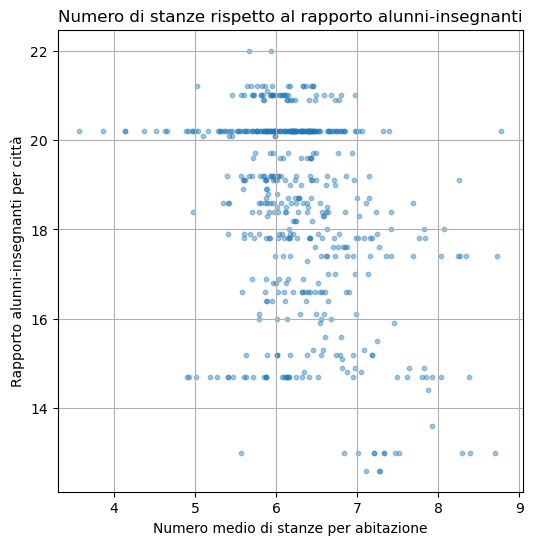

In [82]:
# metodo con matplotlib
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(6, 6))  # Imposta le dimensioni della figura
plt.scatter(boston["rm"], boston["ptratio"], s=10, alpha=0.4) # Imposta le dimensioni dei punti
plt.title("Numero di stanze rispetto al rapporto alunni-insegnanti")
plt.xlabel("Numero medio di stanze per abitazione")
plt.ylabel("Rapporto alunni-insegnanti per città")
plt.grid(True)
plt.show()

In [50]:
#• E del valore delle case? Appare esserci una qualche correlazione? Come si può spiegare il risultato?
corr_room_price = boston[["rm", "medv"]].corr()

corr_room_price

,rm,medv
rm,1.00000,0.69536
medv,0.69536,1.00000


<Axes: xlabel='rm', ylabel='medv'>

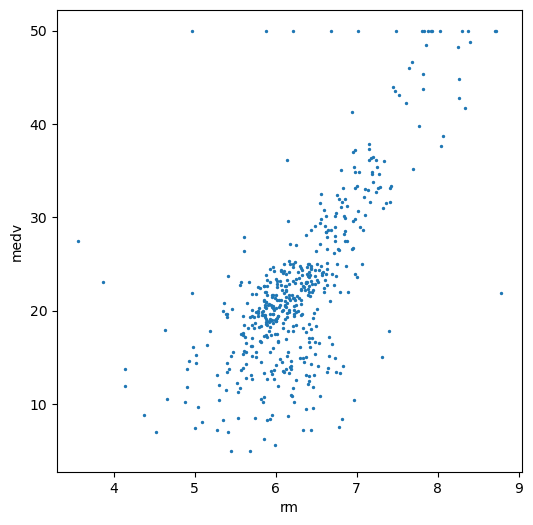

In [62]:
# metodo con pandas
boston.plot.scatter("rm", "medv", figsize = (6, 6), s= 2)

In [52]:
# • Rispetto all'accessibilità alle autostrade, cambia qualcosa la media delle età delle abitazioni? 
corr_street_agehouse = boston[["age", "rad"]].corr()

corr_street_agehouse


,age,rad
age,1.000000,0.456022
rad,0.456022,1.000000


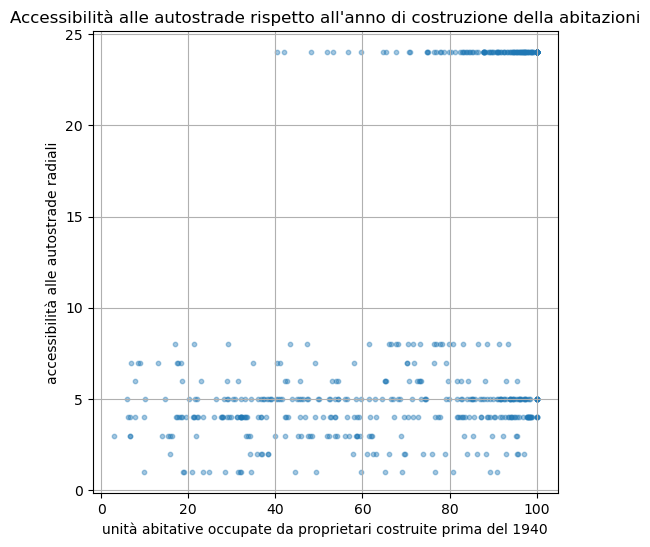

In [84]:
import matplotlib.pyplot as plt
# Scatter plot
plt.figure(figsize=(6, 6))  # Imposta le dimensioni della figura
plt.scatter(boston["age"], boston["rad"], s=10, alpha=0.4) # Imposta le dimensioni dei punti e la trasparenza
plt.title("Accessibilità alle autostrade rispetto all'anno di costruzione della abitazioni")
plt.xlabel("unità abitative occupate da proprietari costruite prima del 1940")
plt.ylabel("accessibilità alle autostrade radiali")
plt.grid(True)
plt.show()

In [92]:
# E del numero di stanze?
corr_room_street = boston[["rm", "rad"]].corr()

corr_room_street

,rm,rad
rm,1.000000,-0.209847
rad,-0.209847,1.000000


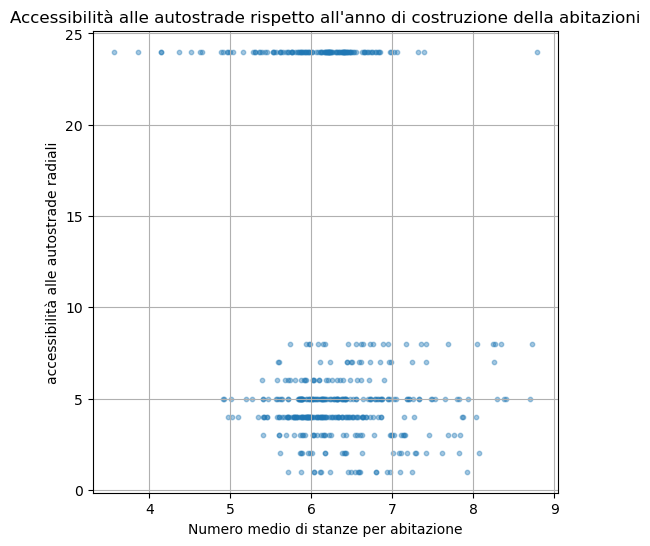

In [94]:
# E del numero di stanze? 
import matplotlib.pyplot as plt
# Scatter plot
plt.figure(figsize=(6, 6))  # Imposta le dimensioni della figura
plt.scatter(boston["rm"], boston["rad"], s=10, alpha=0.4) # Imposta le dimensioni dei punti e la trasparenza
plt.title("Accessibilità alle autostrade rispetto all'anno di costruzione della abitazioni")
plt.xlabel("Numero medio di stanze per abitazione")
plt.ylabel("accessibilità alle autostrade radiali")
plt.grid(True)
plt.show()

In [96]:
# E delle tasse?
corr_tax_street = boston[["tax", "rad"]].corr()

corr_room_street

,rm,rad
rm,1.000000,-0.209847
rad,-0.209847,1.000000


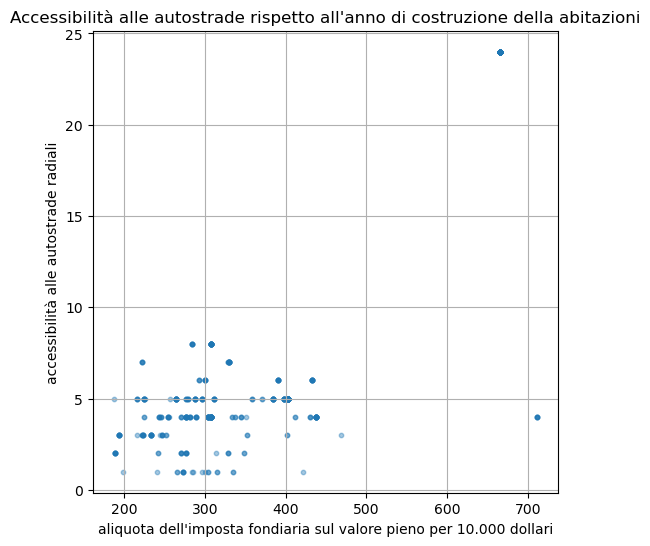

In [100]:
import matplotlib.pyplot as plt
# Scatter plot
plt.figure(figsize=(6, 6))  # Imposta le dimensioni della figura
plt.scatter(boston["tax"], boston["rad"], s=10, alpha=0.4) # Imposta le dimensioni dei punti e la trasparenza
plt.title("Accessibilità alle autostrade rispetto all'anno di costruzione della abitazioni")
plt.xlabel("aliquota dell'imposta fondiaria sul valore pieno per 10.000 dollari")
plt.ylabel("accessibilità alle autostrade radiali")
plt.grid(True)
plt.show()

Abbiamo un DataFrame di dipendenti:
employees_df = pd.DataFrame({
'employee_id': [101, 102, 103, 104, 105],
'name': ['Alice', 'Bob', 'Charlie', 'David', 'Emma'],
'department_id': [1, 2, 1, 2, 3]
})

E un DataFrame di dipartimenti:
departments_df = pd.DataFrame({
'department_id': [1, 2, 3],
'department_name': ['HR', 'IT', 'Finance'],
'location': ['New York', 'San Francisco', 'Chicago']
})
• Unire questi DataFrame in base alla colonna comune department_id, in modo da avere nel risultato informazioni sia sui dipendenti che sui dipartimenti, usando la funzione .merge()
• Per ogni DataFrame, trasformare la colonna department_id nell'indice, facendo in modo che la modifica sia permanente; poi unire i due dataset mediante il metodo .join()
• Ci sono differenze nel risultato? Quali? Perché?

In [102]:
employees_df = pd.DataFrame({
'employee_id': [101, 102, 103, 104, 105],
'name': ['Alice', 'Bob', 'Charlie', 'David', 'Emma'],
'department_id': [1, 2, 1, 2, 3]
})
departments_df = pd.DataFrame({
'department_id': [1, 2, 3],
'department_name': ['HR', 'IT', 'Finance'],
'location': ['New York', 'San Francisco', 'Chicago']
})

In [110]:
employees_df

,employee_id,name,department_id
0,101,Alice,1
1,102,Bob,2
2,103,Charlie,1
3,104,David,2
4,105,Emma,3


In [114]:
departments_df

,department_id,department_name,location
0,1,HR,New York
1,2,IT,San Francisco
2,3,Finance,Chicago


In [126]:
# • Unire questi DataFrame in base alla colonna comune department_id, in modo da avere nel risultato informazioni sia sui dipendenti che sui dipartimenti, usando la funzione .merge()

new_merge = employees_df.merge(departments_df, on = 'department_id')
new_merge

,employee_id,name,department_id,department_name,location
0,101,Alice,1,HR,New York
1,102,Bob,2,IT,San Francisco
2,103,Charlie,1,HR,New York
3,104,David,2,IT,San Francisco
4,105,Emma,3,Finance,Chicago


In [134]:
# • Per ogni DataFrame, trasformare la colonna department_id nell'indice, facendo in modo che la modifica sia permanente; poi unire i due dataset mediante il metodo .join()
new_employees = employees_df.set_index("department_id")
new_departments = departments_df.set_index("department_id")

In [130]:
new_employees

,employee_id,name
department_id,,
1,101,Alice
2,102,Bob
1,103,Charlie
2,104,David
3,105,Emma


In [136]:
new_departments

,department_name,location
department_id,,
1,HR,New York
2,IT,San Francisco
3,Finance,Chicago


In [140]:
df_join = new_employees.join(new_departments)
df_join

,employee_id,name,department_name,location
department_id,,,,
1,101,Alice,HR,New York
2,102,Bob,IT,San Francisco
1,103,Charlie,HR,New York
2,104,David,IT,San Francisco
3,105,Emma,Finance,Chicago


In [142]:
new_merge

,employee_id,name,department_id,department_name,location
0,101,Alice,1,HR,New York
1,102,Bob,2,IT,San Francisco
2,103,Charlie,1,HR,New York
3,104,David,2,IT,San Francisco
4,105,Emma,3,Finance,Chicago


• Dal database AdventureWorksDW importiamo le tabelle dimemployee e
dimemployeesalesterritory come DataFrame
• Effettuiamo un join tra i due DataFrame usando le colonne EmployeeKey
• Controlliamo la dimensione del DataFrame risultante: è quella attesa?
• Importiamo ora la tabella dimsalesterritory ed effettuiamo un join tra
questa e il DataFrame risultante della join precedente, usando le colonne
SalesTerritoryKey
• Su questo DataFrame contare quanti dipendenti ci sono per ogni paese
(country) e per ogni regione (region)
• Valutiamo la media del BaseRate per ogni paese: ci sono differenze?

In [4]:
# importiamo le tabelle dimemployee e dimemployeesalesterritory
import os
import dotenv
import sqlalchemy
import pandas as pd

dotenv.load_dotenv(override=True)

username = os.getenv("username")
password = os.getenv("password")
host = os.getenv("host")
dbname = os.getenv("dbname")

conn_string = "mysql+pymysql://" + username + ":" + password + "@" + host + "/" + dbname

db_engine = sqlalchemy.create_engine(conn_string)

query = "SELECT * FROM dimemployee"
pd.read_sql(query, db_engine)



,EmployeeKey,ParentEmployeeKey,EmployeeNationalIDAlternateKey,ParentEmployeeNationalIDAlternateKey,FirstName,LastName,MiddleName,NameStyle,Title,HireDate,...,Gender,PayFrequency,BaseRate,VacationHours,SickLeaveHours,CurrentFlag,SalesPersonFlag,DepartmentName,EmployeePhoto,Position
0,1,18.0,14417807,446466105.0,Guy,Gilbert,R,0,Production Technician - WC60,2006-01-28,...,M,1,12.4500,21,30,1,0,Production,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None
1,2,7.0,253022876,24756624.0,Kevin,Brown,F,0,Marketing Assistant,2006-08-26,...,M,2,13.4615,42,41,1,0,Marketing,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None
2,3,14.0,509647174,245797967.0,Roberto,Tamburello,None,0,Engineering Manager,2007-06-11,...,M,2,43.2692,2,21,1,0,Engineering,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None
3,4,3.0,112457891,509647174.0,Rob,Walters,None,0,Senior Tool Designer,2007-07-05,...,M,2,29.8462,48,80,1,0,Tool Design,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None
4,5,3.0,112457891,509647174.0,Rob,Walters,None,0,Senior Tool Designer,2007-07-05,...,M,2,29.8462,48,80,1,0,Tool Design,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,292,290.0,134219713,982310417.0,Ranjit,Varkey Chudukatil,R,0,Sales Representative,2011-12-29,...,M,2,23.0769,34,37,1,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Representative
292,293,272.0,90836195,502097814.0,Tete,Mensa-Annan,A,0,Sales Representative,2012-04-30,...,M,2,23.0769,39,39,1,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Representative
293,294,277.0,481044938,112432117.0,Syed,Abbas,E,0,Pacific Sales Manager,2012-10-12,...,M,2,48.1010,20,30,1,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Manager
294,295,290.0,954276278,982310417.0,Rachel,Valdez,B,0,Sales Representative,2012-12-28,...,F,2,23.0769,35,37,1,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Representative


In [5]:
query = """ SELECT * 
FROM dimemployee"""
dimemployee = pd.read_sql(query, db_engine)
dimemployee.shape

(296, 28)

In [8]:
dimemployee.head(5)

,EmployeeKey,ParentEmployeeKey,EmployeeNationalIDAlternateKey,ParentEmployeeNationalIDAlternateKey,FirstName,LastName,MiddleName,NameStyle,Title,HireDate,...,Gender,PayFrequency,BaseRate,VacationHours,SickLeaveHours,CurrentFlag,SalesPersonFlag,DepartmentName,EmployeePhoto,Position
0,1,18.0,14417807,446466105.0,Guy,Gilbert,R,0,Production Technician - WC60,2006-01-28,...,M,1,12.4500,21,30,1,0,Production,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None
1,2,7.0,253022876,24756624.0,Kevin,Brown,F,0,Marketing Assistant,2006-08-26,...,M,2,13.4615,42,41,1,0,Marketing,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None
2,3,14.0,509647174,245797967.0,Roberto,Tamburello,None,0,Engineering Manager,2007-06-11,...,M,2,43.2692,2,21,1,0,Engineering,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None
3,4,3.0,112457891,509647174.0,Rob,Walters,None,0,Senior Tool Designer,2007-07-05,...,M,2,29.8462,48,80,1,0,Tool Design,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None
4,5,3.0,112457891,509647174.0,Rob,Walters,None,0,Senior Tool Designer,2007-07-05,...,M,2,29.8462,48,80,1,0,Tool Design,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None


In [10]:
dimemployee.describe()

,EmployeeKey,ParentEmployeeKey,EmployeeNationalIDAlternateKey,ParentEmployeeNationalIDAlternateKey,NameStyle,SalariedFlag,PayFrequency,BaseRate,VacationHours,SickLeaveHours,CurrentFlag,SalesPersonFlag
count,296.000000,295.000000,2.960000e+02,2.950000e+02,296.0,296.000000,296.000000,296.000000,296.000000,296.000000,296.0,296.000000
mean,148.500000,109.718644,4.615189e+08,4.171747e+08,0.0,0.189189,1.445946,18.506881,50.368243,45.300676,1.0,0.060811
std,85.592056,86.942073,2.837957e+08,2.626912e+08,0.0,0.392322,0.497911,12.510979,28.652143,14.612305,0.0,0.239388
min,1.000000,3.000000,3.084500e+04,3.084500e+04,0.0,0.000000,1.000000,9.000000,0.000000,20.000000,1.0,0.000000
25%,74.750000,27.000000,2.341230e+08,2.771735e+08,0.0,0.000000,1.000000,11.000000,26.750000,33.000000,1.0,0.000000
50%,148.500000,89.000000,4.407119e+08,3.982239e+08,0.0,0.000000,1.000000,14.000000,50.000000,45.000000,1.0,0.000000
75%,222.250000,186.000000,6.912630e+08,6.301841e+08,0.0,0.000000,2.000000,23.076900,75.000000,58.000000,1.0,0.000000
max,296.000000,294.000000,9.994406e+08,9.823104e+08,0.0,1.000000,2.000000,125.500000,99.000000,80.000000,1.0,1.000000


In [162]:
dimemployee.dtypes

EmployeeKey                               int64
ParentEmployeeKey                       float64
EmployeeNationalIDAlternateKey            int64
ParentEmployeeNationalIDAlternateKey    float64
FirstName                                object
LastName                                 object
MiddleName                               object
NameStyle                                 int64
Title                                    object
HireDate                                 object
BirthDate                                object
LoginID                                  object
EmailAddress                             object
Phone                                    object
MaritalStatus                            object
EmergencyContactName                     object
EmergencyContactPhone                    object
SalariedFlag                              int64
Gender                                   object
PayFrequency                              int64
BaseRate                                

In [18]:
query = "SELECT * FROM dimemployeesalesterritory"
pd.read_sql(query, db_engine)

,EmployeeKey,SalesTerritoryKey
0,272,1
1,277,1
2,286,1
3,289,1
4,293,1
5,272,2
6,277,2
7,281,2
8,272,3
9,277,3


In [14]:
query = """ SELECT * 
FROM dimemployeesalesterritory"""
dimemployeesalesterritory = pd.read_sql(query, db_engine)
dimemployeesalesterritory.shape

(39, 2)

In [16]:
dimemployee_merge = dimemployee.merge(dimemployeesalesterritory, how ='left', on = 'EmployeeKey')
dimemployee_merge

,EmployeeKey,ParentEmployeeKey,EmployeeNationalIDAlternateKey,ParentEmployeeNationalIDAlternateKey,FirstName,LastName,MiddleName,NameStyle,Title,HireDate,...,PayFrequency,BaseRate,VacationHours,SickLeaveHours,CurrentFlag,SalesPersonFlag,DepartmentName,EmployeePhoto,Position,SalesTerritoryKey
0,1,18.0,14417807,446466105.0,Guy,Gilbert,R,0,Production Technician - WC60,2006-01-28,...,1,12.4500,21,30,1,0,Production,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None,NaN
1,2,7.0,253022876,24756624.0,Kevin,Brown,F,0,Marketing Assistant,2006-08-26,...,2,13.4615,42,41,1,0,Marketing,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None,NaN
2,3,14.0,509647174,245797967.0,Roberto,Tamburello,None,0,Engineering Manager,2007-06-11,...,2,43.2692,2,21,1,0,Engineering,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None,NaN
3,4,3.0,112457891,509647174.0,Rob,Walters,None,0,Senior Tool Designer,2007-07-05,...,2,29.8462,48,80,1,0,Tool Design,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None,NaN
4,5,3.0,112457891,509647174.0,Rob,Walters,None,0,Senior Tool Designer,2007-07-05,...,2,29.8462,48,80,1,0,Tool Design,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,292,290.0,134219713,982310417.0,Ranjit,Varkey Chudukatil,R,0,Sales Representative,2011-12-29,...,2,23.0769,34,37,1,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Representative,7.0
313,293,272.0,90836195,502097814.0,Tete,Mensa-Annan,A,0,Sales Representative,2012-04-30,...,2,23.0769,39,39,1,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Representative,1.0
314,294,277.0,481044938,112432117.0,Syed,Abbas,E,0,Pacific Sales Manager,2012-10-12,...,2,48.1010,20,30,1,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Manager,9.0
315,295,290.0,954276278,982310417.0,Rachel,Valdez,B,0,Sales Representative,2012-12-28,...,2,23.0769,35,37,1,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Representative,8.0


In [168]:
dimemployee= dimemployee.set_index("EmployeeKey")
dimemployeesalesterritory = dimemployeesalesterritory.set_index("EmployeeKey")
dimemployee_join = dimemployee.join(dimemployeesalesterritory)
dimemployee_join

,ParentEmployeeKey,EmployeeNationalIDAlternateKey,ParentEmployeeNationalIDAlternateKey,FirstName,LastName,MiddleName,NameStyle,Title,HireDate,BirthDate,...,PayFrequency,BaseRate,VacationHours,SickLeaveHours,CurrentFlag,SalesPersonFlag,DepartmentName,EmployeePhoto,Position,SalesTerritoryKey
EmployeeKey,,,,,,,,,,,,,,,,,,,,,
1,18.0,14417807,446466105.0,Guy,Gilbert,R,0,Production Technician - WC60,2006-01-28,1981-11-12,...,1,12.4500,21,30,1,0,Production,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None,NaN
2,7.0,253022876,24756624.0,Kevin,Brown,F,0,Marketing Assistant,2006-08-26,1986-12-01,...,2,13.4615,42,41,1,0,Marketing,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None,NaN
3,14.0,509647174,245797967.0,Roberto,Tamburello,None,0,Engineering Manager,2007-06-11,1974-06-12,...,2,43.2692,2,21,1,0,Engineering,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None,NaN
4,3.0,112457891,509647174.0,Rob,Walters,None,0,Senior Tool Designer,2007-07-05,1974-07-23,...,2,29.8462,48,80,1,0,Tool Design,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None,NaN
5,3.0,112457891,509647174.0,Rob,Walters,None,0,Senior Tool Designer,2007-07-05,1974-07-23,...,2,29.8462,48,80,1,0,Tool Design,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,290.0,134219713,982310417.0,Ranjit,Varkey Chudukatil,R,0,Sales Representative,2011-12-29,1975-04-30,...,2,23.0769,34,37,1,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Representative,7.0
293,272.0,90836195,502097814.0,Tete,Mensa-Annan,A,0,Sales Representative,2012-04-30,1977-08-05,...,2,23.0769,39,39,1,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Representative,1.0
294,277.0,481044938,112432117.0,Syed,Abbas,E,0,Pacific Sales Manager,2012-10-12,1974-08-11,...,2,48.1010,20,30,1,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Manager,9.0


In [24]:
# • Importiamo ora la tabella dimsalesterritory ed effettuiamo un join tra questa e il DataFrame risultante della join precedente, usando le colonne SalesTerritoryKey

query = """ SELECT * 
FROM dimsalesterritory"""
dimsalesterritory = pd.read_sql(query, db_engine)
dimsalesterritory

,SalesTerritoryKey,SalesTerritoryAlternateKey,SalesTerritoryRegion,SalesTerritoryCountry,SalesTerritoryGroup,SalesTerritoryImage
0,1,1,Northwest,United States,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
1,2,2,Northeast,United States,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
2,3,3,Central,United States,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
3,4,4,Southwest,United States,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
4,5,5,Southeast,United States,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
5,6,6,Canada,Canada,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
6,7,7,France,France,Europe,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
7,8,8,Germany,Germany,Europe,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
8,9,9,Australia,Australia,Pacific,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
9,10,10,United Kingdom,United Kingdom,Europe,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...


In [22]:
dimsalesterritory.describe()

,SalesTerritoryKey,SalesTerritoryAlternateKey
count,11.000000,11.000000
mean,6.000000,5.000000
std,3.316625,3.316625
min,1.000000,0.000000
25%,3.500000,2.500000
50%,6.000000,5.000000
75%,8.500000,7.500000
max,11.000000,10.000000


In [28]:
dimemployee_dimsalesterritory_merge = dimemployee_merge.merge(dimsalesterritory, how ='left', on = 'SalesTerritoryKey')
dimemployee_d"Emimsalesterritory_merge

,EmployeeKey,ParentEmployeeKey,EmployeeNationalIDAlternateKey,ParentEmployeeNationalIDAlternateKey,FirstName,LastName,MiddleName,NameStyle,Title,HireDate,...,SalesPersonFlag,DepartmentName,EmployeePhoto,Position,SalesTerritoryKey,SalesTerritoryAlternateKey,SalesTerritoryRegion,SalesTerritoryCountry,SalesTerritoryGroup,SalesTerritoryImage
0,1,18.0,14417807,446466105.0,Guy,Gilbert,R,0,Production Technician - WC60,2006-01-28,...,0,Production,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None,NaN,NaN,NaN,NaN,NaN,NaN
1,2,7.0,253022876,24756624.0,Kevin,Brown,F,0,Marketing Assistant,2006-08-26,...,0,Marketing,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None,NaN,NaN,NaN,NaN,NaN,NaN
2,3,14.0,509647174,245797967.0,Roberto,Tamburello,None,0,Engineering Manager,2007-06-11,...,0,Engineering,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None,NaN,NaN,NaN,NaN,NaN,NaN
3,4,3.0,112457891,509647174.0,Rob,Walters,None,0,Senior Tool Designer,2007-07-05,...,0,Tool Design,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None,NaN,NaN,NaN,NaN,NaN,NaN
4,5,3.0,112457891,509647174.0,Rob,Walters,None,0,Senior Tool Designer,2007-07-05,...,0,Tool Design,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,292,290.0,134219713,982310417.0,Ranjit,Varkey Chudukatil,R,0,Sales Representative,2011-12-29,...,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Representative,7.0,7.0,France,France,Europe,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
313,293,272.0,90836195,502097814.0,Tete,Mensa-Annan,A,0,Sales Representative,2012-04-30,...,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Representative,1.0,1.0,Northwest,United States,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
314,294,277.0,481044938,112432117.0,Syed,Abbas,E,0,Pacific Sales Manager,2012-10-12,...,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Manager,9.0,9.0,Australia,Australia,Pacific,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
315,295,290.0,954276278,982310417.0,Rachel,Valdez,B,0,Sales Representative,2012-12-28,...,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Representative,8.0,8.0,Germany,Germany,Europe,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...


In [32]:
# • Su questo DataFrame contare quanti dipendenti ci sono per ogni paese (country) e per ogni regione (region)
dimemployee_dimsalesterritory_merge.dtypes

EmployeeKey                               int64
ParentEmployeeKey                       float64
EmployeeNationalIDAlternateKey            int64
ParentEmployeeNationalIDAlternateKey    float64
FirstName                                object
LastName                                 object
MiddleName                               object
NameStyle                                 int64
Title                                    object
HireDate                                 object
BirthDate                                object
LoginID                                  object
EmailAddress                             object
Phone                                    object
MaritalStatus                            object
EmergencyContactName                     object
EmergencyContactPhone                    object
SalariedFlag                              int64
Gender                                   object
PayFrequency                              int64
BaseRate                                

In [40]:
dimemployee_dimsalesterritory_merge.groupby(["SalesTerritoryCountry"])["EmployeeKey"].nunique()

SalesTerritoryCountry
Australia          3
Canada             4
France             4
Germany            3
United Kingdom     3
United States     10
Name: EmployeeKey, dtype: int64

In [42]:
dimemployee_dimsalesterritory_merge.groupby(["SalesTerritoryRegion"])["EmployeeKey"].nunique()

SalesTerritoryRegion
Australia         3
Canada            4
Central           5
France            4
Germany           3
Northeast         3
Northwest         5
Southeast         4
Southwest         5
United Kingdom    3
Name: EmployeeKey, dtype: int64

In [46]:
dimemployee_dimsalesterritory_merge.groupby(["SalesTerritoryCountry"])["BaseRate"].mean()

SalesTerritoryCountry
Australia         47.764433
Canada            41.592550
France            41.592550
Germany           47.764433
United Kingdom    47.764433
United States     39.909309
Name: BaseRate, dtype: float64

In [44]:
dimemployee_dimsalesterritory_merge.groupby(["SalesTerritoryRegion"])["BaseRate"].mean()

SalesTerritoryRegion
Australia         47.764433
Canada            41.592550
Central           37.889420
France            41.592550
Germany           47.764433
Northeast         47.764433
Northwest         37.889420
Southeast         41.592550
Southwest         37.889420
United Kingdom    47.764433
Name: BaseRate, dtype: float64